In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./Downloads/AMC_health_and_safety_data.xlsx")

In [19]:
colnames = df.columns
colnames

Index(['DOCUMENT_NO', 'SUBUNIT_CD', 'SUBUNIT', 'ACCIDENT_DT', 'CAL_YR',
       'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'DEGREE_INJURY', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_LOCATION', 'UG_MINING_METHOD_CD', 'UG_MINING_METHOD',
       'MINING_EQUIP_CD', 'MINING_EQUIP', 'EQUIP_MFR_CD', 'EQUIP_MFR_NAME',
       'EQUIP_MODEL_NO', 'SHIFT_BEGIN_TIME', 'ACCIDENT_TYPE', 'NO_INJURIES',
       'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'OCCUPATION',
       'ACTIVITY_CD', 'ACTIVITY', 'INJURY_SOURCE_CD', 'INJURY_SOURCE',
       'NATURE_INJURY_CD', 'NATURE_INJURY', 'INJ_BODY_PART_CD',
       'INJ_BODY_PART', 'SCHEDULE_CHARGE', 'DAYS_RESTRICT', 'DAYS_LOST',
       'TRANS_TERM', 'RETURN_TO_WORK_DT', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY',
       'INVEST_BEGIN_DT', 'NARRATIVE', 'CLOSED_DOC_NO', 'COAL_METAL_IND',
       'CLASSIFICATION'],
      dtype='object')

In [10]:
df.describe()

,DOCUMENT_NO,SUBUNIT_CD,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,FIPS_STATE_CD,SHIFT_BEGIN_TIME,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,CLOSED_DOC_NO
count,3.601600e+04,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,35984.000000,36016.000000,33287.000000,33703.000000,33817.000000,26012.000000,26038.000000,31796.000000,1.788600e+04
mean,2.200876e+11,4.480231,2008.520824,2.460656,2008.746446,2.558169,1381.135023,39.095569,1313.260532,1.008885,13.619204,5.723015,6.886996,72.246079,3.957140,42.912002,3.200701e+11
std,6.297331e+07,9.700525,6.288091,1.101716,6.303127,1.109400,1384.876660,15.943200,1113.138097,1.082225,11.448689,8.053749,8.300943,637.465785,18.622301,76.015700,2.281208e+09
min,2.200000e+11,1.000000,2000.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,3.200414e+10
25%,2.200320e+11,1.000000,2003.000000,1.000000,2003.000000,2.000000,789.000000,21.000000,700.000000,1.000000,3.380000,0.620000,1.000000,0.000000,0.000000,0.000000,3.200310e+11
50%,2.200810e+11,1.000000,2008.000000,2.000000,2008.000000,3.000000,1205.000000,42.000000,800.000000,1.000000,10.000000,2.190000,3.270000,0.000000,0.000000,8.000000,3.200830e+11
75%,2.201330e+11,3.000000,2013.000000,3.000000,2013.000000,4.000000,1745.000000,54.000000,1600.000000,1.000000,23.230000,7.000000,10.000000,0.000000,0.000000,54.000000,3.201430e+11
max,2.202310e+11,99.000000,2023.000000,4.000000,2023.000000,4.000000,9999.000000,56.000000,9999.000000,36.000000,60.000000,53.620000,60.000000,6000.000000,1018.000000,2470.000000,3.202310e+11


In [31]:
df.describe(include=["object"])

,SUBUNIT,DEGREE_INJURY_CD,DEGREE_INJURY,UG_LOCATION_CD,UG_LOCATION,UG_MINING_METHOD_CD,UG_MINING_METHOD,MINING_EQUIP_CD,MINING_EQUIP,EQUIP_MFR_CD,...,NATURE_INJURY_CD,NATURE_INJURY,INJ_BODY_PART_CD,INJ_BODY_PART,TRANS_TERM,IMMED_NOTIFY_CD,IMMED_NOTIFY,NARRATIVE,COAL_METAL_IND,CLASSIFICATION
count,36016,36016,36016,36016,36016,36016,36016,36016,36016,36016,...,36016,36016,36016,36016,34175,36016,36016,36016,36016,36016
unique,9,12,12,9,9,8,8,64,64,172,...,30,30,47,47,2,14,14,35939,2,11
top,UNDERGROUND,3,DAYS AWAY FROM WORK ONLY,?,NO VALUE FOUND,5,Continuous Mining,?,NO VALUE FOUND,?,...,330,"SPRAIN,STRAIN RUPT DISC",340,FINGER(S)/THUMB,N,?,NO VALUE FOUND,during a mine explosion ee was fatally injured.,C,HANDLING OF MATERIALS
freq,24492,19773,19773,11524,11524,16855,16855,17479,17479,17483,...,12093,12093,6298,6298,32219,24203,24203,19,35988,22491


In [29]:
# convert "Start Date" column to datetime data type
"""date_cols = [word for word in colnames if word.endswith("DT")]
print(date_cols)
df[date_cols] = pd.to_datetime(df[date_cols])"""
df['ACCIDENT_DT'] = pd.to_datetime(df['ACCIDENT_DT'])
df['RETURN_TO_WORK_DT'] = pd.to_datetime(df['RETURN_TO_WORK_DT'])
df['INVEST_BEGIN_DT'] = pd.to_datetime(df['INVEST_BEGIN_DT'])

In [5]:
df["CLASSIFICATION"].unique()

array(['HANDLING OF MATERIALS', 'SLIP OR FALL OF PERSON', 'HAULAGE',
       'FIRE/EXPLOSION', 'EXPLOSIVES AND BREAKING AGENTS', 'ELECTRICAL',
       'EXPLODING VESSELS UNDER PRESSURE', 'TOXIC', 'ENTRAPMENT',
       'INUNDATION', 'OTHER'], dtype=object)

In [7]:
counts = df["CLASSIFICATION"].value_counts()
counts

HANDLING OF MATERIALS               22491
SLIP OR FALL OF PERSON               7275
HAULAGE                              3830
FIRE/EXPLOSION                        779
OTHER                                 734
ELECTRICAL                            291
ENTRAPMENT                            248
INUNDATION                            168
EXPLODING VESSELS UNDER PRESSURE      165
EXPLOSIVES AND BREAKING AGENTS         22
TOXIC                                  13
Name: CLASSIFICATION, dtype: int64

In [9]:
colors = sns.color_palette('pastel')

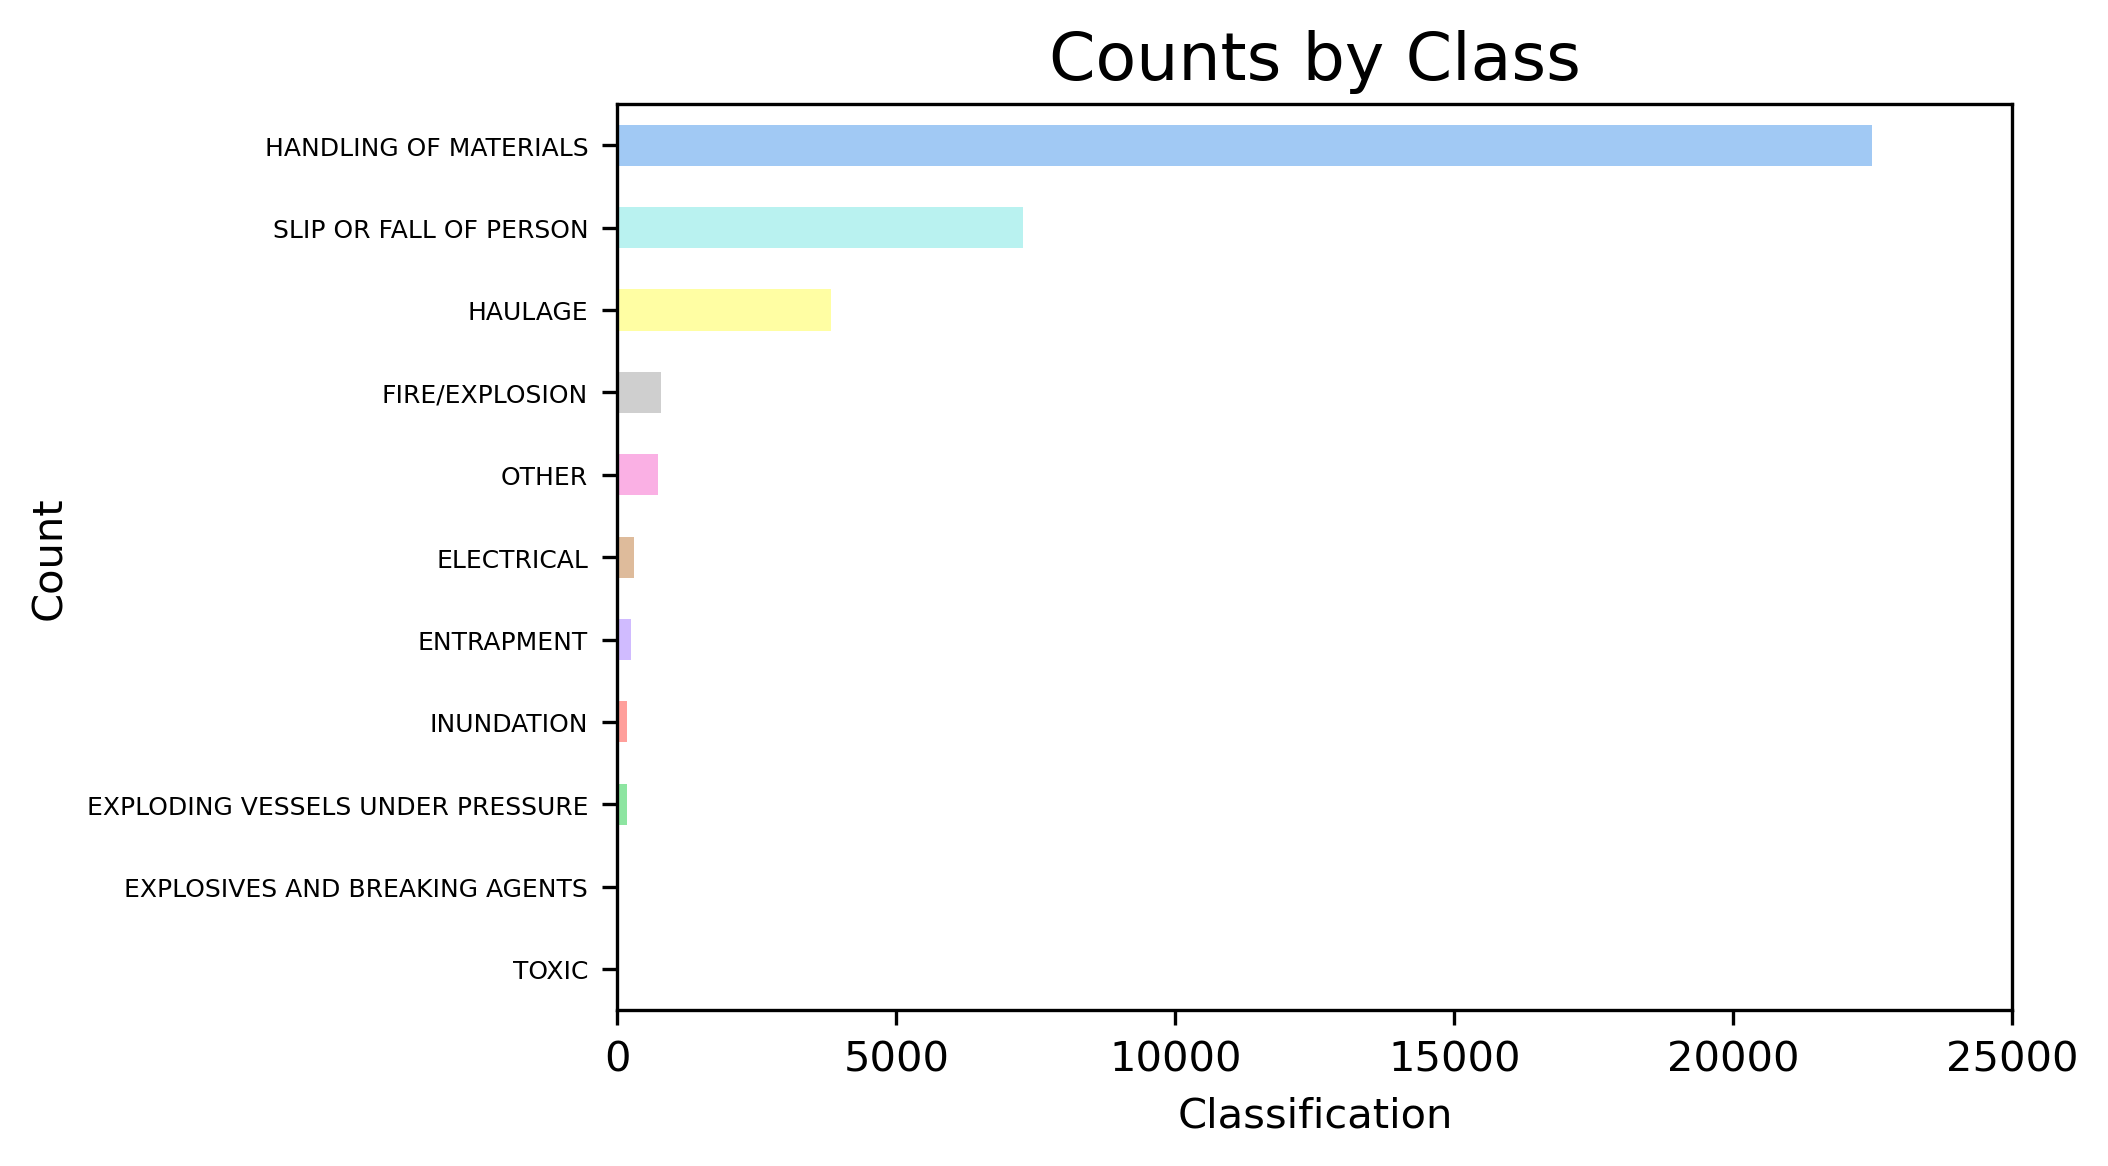

In [8]:
fig, ax = plt.subplots( dpi=300)
counts[::-1].plot(kind="barh",color=colors)

plt.xlabel('Classification',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Counts by Class',fontsize=16)
plt.tick_params(axis='y', labelsize=6)
plt.xlim(right=25000)
# Annotate count values on top of the bars
#for i, count in enumerate(counts[::-1]):
#    ax.text(count + 0.1, i, str(count), ha='left', va='center')
    
#max_count = counts.max()
#ax.text(max_count + 0.1, len(counts) - 1, str(max_count), ha='right', va='center')

plt.show()

In [35]:
counts = df["SUBUNIT_CD"].value_counts()
counts

1     24492
3      5642
30     3528
2      2125
99       85
17       63
4        45
5        30
6         6
Name: SUBUNIT_CD, dtype: int64

In [41]:
counts = df["CAL_YR"].value_counts()
counts.index

Int64Index([2000, 2001, 2002, 2004, 2006, 2005, 2011, 2008, 2003, 2007, 2010,
            2009, 2012, 2013, 2014, 2015, 2019, 2017, 2018, 2016, 2022, 2020,
            2021, 2023],
           dtype='int64')

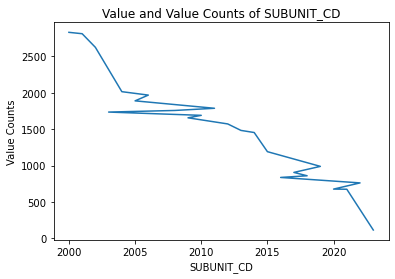

In [47]:
# Create a bar plot
plt.plot(counts.index,counts.values)

# Add a title and labels to the axes
plt.title("Value and Value Counts of SUBUNIT_CD")
plt.xlabel("SUBUNIT_CD")
plt.ylabel("Value Counts")

# Show the plot
plt.show()